In [1]:
import numpy as np
import random

np.random.seed(0)
random.seed(0)

# Q1 (e)

In [2]:
from sklearn.linear_model import LinearRegression
# Implementation of matplotlib function

import matplotlib.pyplot as plt

In [3]:
#Please modify the code and load X and y in training set

X = np.array([
     [1, 5.86],
     [1, 1.34],
     [1, 3.65],
     [1, 4.69],
     [1, 4.13],
     [1, 4.87],
     [1, 7.91],
     [1, 5.57],
     [1, 7.30],
     [1, 7.89]
])


Xtrain = np.array([
     [5.86],
     [1.34],
     [3.65],
     [4.69],
     [4.13],
     [4.87],
     [7.91],
     [5.57],
     [7.30],
     [7.89]
])
Xtrain2 = np.insert(Xtrain,1, (Xtrain.T)**2, axis = 1)
Xtrain3 = np.insert(Xtrain2,2, (Xtrain.T)**3, axis = 1)
Xtrain4 = np.insert(Xtrain3,3, (Xtrain.T)**4, axis = 1)

Ytrain = np.array([
    0.74,
    1.18,
    0.51,
    -0.48,
    -0.07,
    0.37,
    1.35,
    0.30,
    1.64,
    1.75
])
print(Xtrain2)

[[ 5.86   34.3396]
 [ 1.34    1.7956]
 [ 3.65   13.3225]
 [ 4.69   21.9961]
 [ 4.13   17.0569]
 [ 4.87   23.7169]
 [ 7.91   62.5681]
 [ 5.57   31.0249]
 [ 7.3    53.29  ]
 [ 7.89   62.2521]]


In [4]:
# Please use LinearRegression function in sklearn to fit the training set and report the fitted coefficient 
reg1 = LinearRegression()
reg1.fit(Xtrain,Ytrain)

theta_0 = reg1.intercept_
theta_1 = reg1.coef_

print("1st order Theta 0: ", theta_0)
print("1st order Theta 1: ", theta_1)

1st order Theta 0:  -0.15888573245285598
1st order Theta 1:  [0.16686445]


In [5]:
reg2 = LinearRegression()
reg2.fit(Xtrain2,Ytrain)

theta_0 = reg2.intercept_
theta_1 = reg2.coef_

print("2nd order Theta 0: ", theta_0)
print("2nd order Theta 1: ", theta_1)

2nd order Theta 0:  2.3202144771059294
2nd order Theta 1:  [-1.02395919  0.12002863]


In [6]:
reg3 = LinearRegression()
reg3.fit(Xtrain4,Ytrain)

theta_0 = reg3.intercept_
theta_1 = reg3.coef_

print("4th order Theta 0: ", theta_0)
print("4th order Theta 1: ", theta_1)

4th order Theta 0:  -4.659619208111492
4th order Theta 1:  [ 8.13976977 -3.52876745  0.57072586 -0.03062518]


# Q2 (a)

Lgistic Regression: 
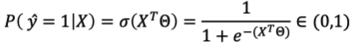

Cross-Entropy error: image.png

# Q2 (b)

In [7]:
import math as m
from sklearn.linear_model import LogisticRegression



def calculate_loss(X, y, theta):
    f_x = X.dot(theta)
    y_probs = 1 / (1 + np.exp(-f_x))
    # loss calculation here
    loss = float(0.0)
    for i in range(len(X)):
      
      loss = (loss -y[i]*m.log(y_probs[i])- (1-y[i])*m.log(1-y_probs[i]))
    return loss


def calculate_grad(X, y, theta):
    """
    Calculate the gradient of the cross-entropy loss w.r.t. theta
    """
    f_x = X.dot(theta)
    y_probs = 1 / (1 + np.exp(-f_x))

    
    theta_grad = np.array([ 0, 0, 0]);
    for i in range(len(X)):
      theta_grad = theta_grad+ (( y_probs[i] - y[i])  *X[i])

    return theta_grad


def has_converged(loss, new_loss):
    """
    Check if the model has converged and loss remains stable.
    """
    return abs(loss - new_loss) < 0.000001
    

def calculate_new_theta(theta, theta_grad, alpha):
    """
    Calculate the updated theta based on theta, gradient of theta, and step size
    """
    return theta - alpha * theta_grad


In [8]:
# Please load load X and y in training set


#Write your code here to initialize Data. 
Trainingset = np.array([[0.346, 0.780,0],
                   [0.303, 0.439, 0],
                   [0.358, 0.729, 0],
                   [0.602,0.863,1],
                   [0.790, 0.753, 1],
                   [0.611,0.965,1]])
X = np.insert(Trainingset, 0, 1, axis = 1)
X = np.delete(X,3, axis = 1)
y = Trainingset[:, 2].reshape(-1,1)

print(X)
print(y)


# Initialize parameter and hyperparameters
loss = float('inf')
new_loss = float('inf')
new_theta = np.array([float('inf'), float('inf'), float('inf')])

#initlizae theta and alpha
theta = np.array([-1,-1.5,0.5])
alpha = 0.1


iters = 0

# Perform Logistic Regression
while not has_converged(loss, new_loss):
    loss = new_loss
    theta_grad = calculate_grad(X, y, theta)
    new_theta = calculate_new_theta(theta, theta_grad, alpha)
    new_loss = calculate_loss(X, y, new_theta)

    theta = new_theta
    iters += 1
    # Uncomment the following line to print the loss at each step (for debugging purpose)
    if (iters == 1):
      break
    #print(f"New Theta: {new_theta}, New Loss: {new_loss}, Iteration {iters}")

print(f"Final Theta: {theta}, Loss: {calculate_loss(X, y, theta)}, Total Iterations: {iters}")

[[1.    0.346 0.78 ]
 [1.    0.303 0.439]
 [1.    0.358 0.729]
 [1.    0.602 0.863]
 [1.    0.79  0.753]
 [1.    0.611 0.965]]
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]
Final Theta: [-0.8226067  -1.35756968  0.66662508], Loss: [5.36874025], Total Iterations: 1


In [9]:
# Please load load X and y in training set
Trainingset = np.array( [ [ 0.346, 0.780, 0],
                          [ 0.303, 0.439, 0],
                          [ 0.358, 0.729, 0],
                          [ 0.602, 0.863, 1],
                          [ 0.790, 0.753, 1],
                          [ 0.611, 0.965, 1]])

#Write your code here to initialize Data. 
X4 = np.delete(Trainingset,2,  1);
y4 = Trainingset[:, 2];



# Please load load X and y in training set
Testingset = np.array( [ [ 0.959, 0.382, 0],
                          [ 0.750, 0.306, 0],
                          [ 0.395, 0.760, 0],
                          [ 0.823, 0.764, 1],
                          [ 0.761, 0.874, 1],
                          [ 0.844, 0.435, 1]])
Xtest = np.delete(Testingset, 2, 1);
ytest = Trainingset[:, 2];

In [10]:
#by hand coefficeints predictions one iteration

reg4 = LogisticRegression(max_iter = 0, warm_start = True, solver = 'sag',penalty= 'none')
reg4.intercept_ = np.array([theta[0]])
reg4.coef_ = np.array([[theta[1], theta[2]]])

reg4.fit(X4, y4)

byhand1prediction = reg4.predict(Xtest)
byhand1score = reg4.score(Xtest, ytest )
print(byhand1prediction)
print(byhand1score)
print(f"intercept: {reg4.intercept_}, coeff: {reg4.coef_}, Total Iterations: {reg4.n_iter_}")


[0. 0. 0. 0. 0. 0.]
0.5
intercept: [-0.8226067], coeff: [[-1.35756968  0.66662508]], Total Iterations: [1]


In [11]:
# Initialize parameter and hyperparameters
loss = float('inf')
new_loss = float('inf')
new_theta = np.array([float('inf'), float('inf'), float('inf')])

#initlizae theta and alpha
theta = np.array([-1,-1.5,0.5])
alpha = 0.1


iters = 0

# Perform Logistic Regression
while not has_converged(loss, new_loss):
    loss = new_loss
    theta_grad = calculate_grad(X, y, theta)
    new_theta = calculate_new_theta(theta, theta_grad, alpha)
    new_loss = calculate_loss(X, y, new_theta)

    theta = new_theta
    iters += 1
    # Uncomment the following line to print the loss at each step (for debugging purpose)
    
    #print(f"New Theta: {new_theta}, New Loss: {new_loss}, Iteration {iters}")

print(f"Final Theta: {theta}, Loss: {calculate_loss(X, y, theta)}, Total Iterations: {iters}")

Final Theta: [-23.504214    34.51272616   8.51653485], Loss: [0.02733185], Total Iterations: 26880


In [12]:
#by hand final prediction
reg5 = LogisticRegression(max_iter = 0, warm_start = True, solver = 'sag',penalty= 'none')
reg5.intercept_ = np.array([theta[0]])
reg5.coef_ = np.array([[theta[1], theta[2]]])

reg5.fit(X4, y4)

byhandfinalprediction = reg5.predict(Xtest)
byhandfinalscore = reg5.score(Xtest, ytest )

print(f"intercept: {reg5.intercept_}, coeff: {reg5.coef_}, Total Iterations: {reg5.n_iter_}")

print(f"by hand one iteration prediction : {byhand1prediction}, score : {byhand1score}")

print(f"by hand final prediction : {byhandfinalprediction}, score : {byhandfinalscore}")

intercept: [-23.504214], coeff: [[34.51272616  8.51653485]], Total Iterations: [1]
by hand one iteration prediction : [0. 0. 0. 0. 0. 0.], score : 0.5
by hand final prediction : [1. 1. 0. 1. 1. 1.], score : 0.6666666666666666


# Q2 (c)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
# Please load load X and y in training set
Trainingset = np.array( [ [ 0.346, 0.780, 0],
                          [ 0.303, 0.439, 0],
                          [ 0.358, 0.729, 0],
                          [ 0.602, 0.863, 1],
                          [ 0.790, 0.753, 1],
                          [ 0.611, 0.965, 1]])

#Write your code here to initialize Data. 
X4 = np.delete(Trainingset,2,  1);
#y4 = np.array([[0],
#      [0],
#      [0],
#      [1],
#      [1],
#      [1]
#      ])
y4 = Trainingset[:, 2];


In [15]:
# Single Iteration sklearn

reg6 = LogisticRegression(max_iter = 1, warm_start = True, solver = 'sag',penalty= 'none')
reg6.intercept_ = np.array([-1])
reg6.coef_ = np.array([[-1.5,0.5]])

reg6.fit(X4, y4.flatten())

print(f"intercept: {reg6.intercept_}, coeff: {reg6.coef_}, Total Iterations: {reg6.n_iter_}")



intercept: [-1.15982004], coeff: [[0.27380214 0.7758098 ]], Total Iterations: [1]


/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [16]:
# Final Solution sklearn

reg7 = LogisticRegression(max_iter = 10000, warm_start = True, solver = 'sag',penalty= 'none')
reg7.intercept_ = np.array([-1])
reg7.coef_ = np.array([[-1.5,0.5]])

reg7.fit(X4, y4.flatten(), sample_weight= None)

print(f"intercept: {reg7.intercept_}, coeff: {reg7.coef_}, Total Iterations: {reg7.n_iter_}")

intercept: [-24.6426007], coeff: [[36.22610461  8.90568845]], Total Iterations: [1974]


# Q2 (d)

In [17]:
# Please load load X and y in training set
Testingset = np.array( [ [ 0.959, 0.382, 0],
                          [ 0.750, 0.306, 0],
                          [ 0.395, 0.760, 0],
                          [ 0.823, 0.764, 1],
                          [ 0.761, 0.874, 1],
                          [ 0.844, 0.435, 1]])
Xtest = np.delete(Testingset, 2, 1);
ytest = Trainingset[:, 2];

sklearn1 = reg6.predict(Xtest)
sklearn1score= reg6.score(Xtest, ytest )
finalsklearn = reg7.predict(Xtest)
finalsklearnscore = reg7.score(Xtest, ytest )

print(f"sklearn one iteration prediction : {sklearn1}, score : {sklearn1score}")

print(f"sklearn final prediction : {finalsklearn}, score : {finalsklearnscore}")



sklearn one iteration prediction : [0. 0. 0. 0. 0. 0.], score : 0.5
sklearn final prediction : [1. 1. 0. 1. 1. 1.], score : 0.6666666666666666


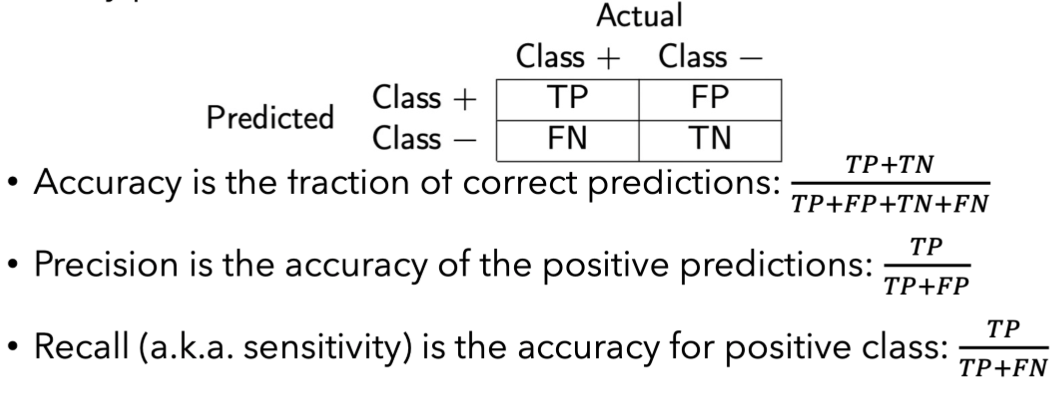

both the final models from 2(b) and 2(c) correctly predicted 4/6 of the samples, and both 

In [18]:
#by hand & sklearn final models
Accuracy1 =  finalsklearnscore
precision1 = 3/5
Recall1 = 3/(3)

# by hand and sklearn one iteration models
Accuracy2 =  sklearn1score
precision2 = "0/0"
Recall2 = 0/(3)

In [19]:
print(f"single iteration models - Accuracy : {Accuracy2}, Precision : {precision2}, Recall : {Recall2} ")
print(f"Final models - Accuracy : {Accuracy1}, Precision : {precision1}, Recall : {Recall1} ")



single iteration models - Accuracy : 0.5, Precision : 0/0, Recall : 0.0 
Final models - Accuracy : 0.6666666666666666, Precision : 0.6, Recall : 1.0 
